## 1. Setup 

### Import and Load the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import asarray

dementia_data = pd.read_csv("data/dementia_data_cleaned_v1.csv", delimiter=",")

## 4. Correlation matrix

The correlation matrix makes a visualization of the pearson correlation between the viables in the dataset

In [2]:
corr = dementia_data. corr(method='pearson', numeric_only=True)
corr

,ID,age,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,SVD Simple Score,SVD Amended Score,Fazekas
ID,1.000000,-0.046014,-0.049805,-0.074244,0.091353,0.028788,0.049457,0.045029,-0.020569,-0.015821,-0.011872,0.048068,-0.161389,-0.330453,-0.021498
age,-0.046014,1.000000,0.173701,0.206106,-0.175322,-0.380768,-0.542289,-0.523573,0.123195,-0.135444,0.291202,0.103096,0.358244,0.331756,0.379611
dementia,-0.049805,0.173701,1.000000,1.000000,-0.063112,-0.241716,-0.233961,-0.255530,0.097750,0.056362,0.078670,0.012507,0.292086,0.327416,0.178736
dementia_all,-0.074244,0.206106,1.000000,1.000000,-0.083296,-0.246340,-0.225134,-0.259383,0.093783,0.050646,0.084812,-0.026371,0.233746,0.286705,0.170325
educationyears,0.091353,-0.175322,-0.063112,-0.083296,1.000000,0.303406,0.208203,0.360729,-0.079616,0.029762,-0.117190,-0.043548,-0.083422,-0.087083,-0.064082
EF,0.028788,-0.380768,-0.241716,-0.246340,0.303406,1.000000,0.545315,0.818113,-0.163300,0.014309,-0.198074,-0.080875,-0.290672,-0.330816,-0.212813
PS,0.049457,-0.542289,-0.233961,-0.225134,0.208203,0.545315,1.000000,0.821135,-0.183027,0.019479,-0.263871,-0.110978,-0.419409,-0.465853,-0.329706
Global,0.045029,-0.523573,-0.255530,-0.259383,0.360729,0.818113,0.821135,1.000000,-0.178460,0.005847,-0.262316,-0.096520,-0.371118,-0.410180,-0.305393
diabetes,-0.020569,0.123195,0.097750,0.093783,-0.079616,-0.163300,-0.183027,-0.178460,1.000000,0.051512,0.118692,0.077341,0.111344,0.115742,0.088394
smoking,-0.015821,-0.135444,0.056362,0.050646,0.029762,0.014309,0.019479,0.005847,0.051512,1.000000,-0.009235,-0.060285,0.020081,0.081782,0.023498


<Axes: >

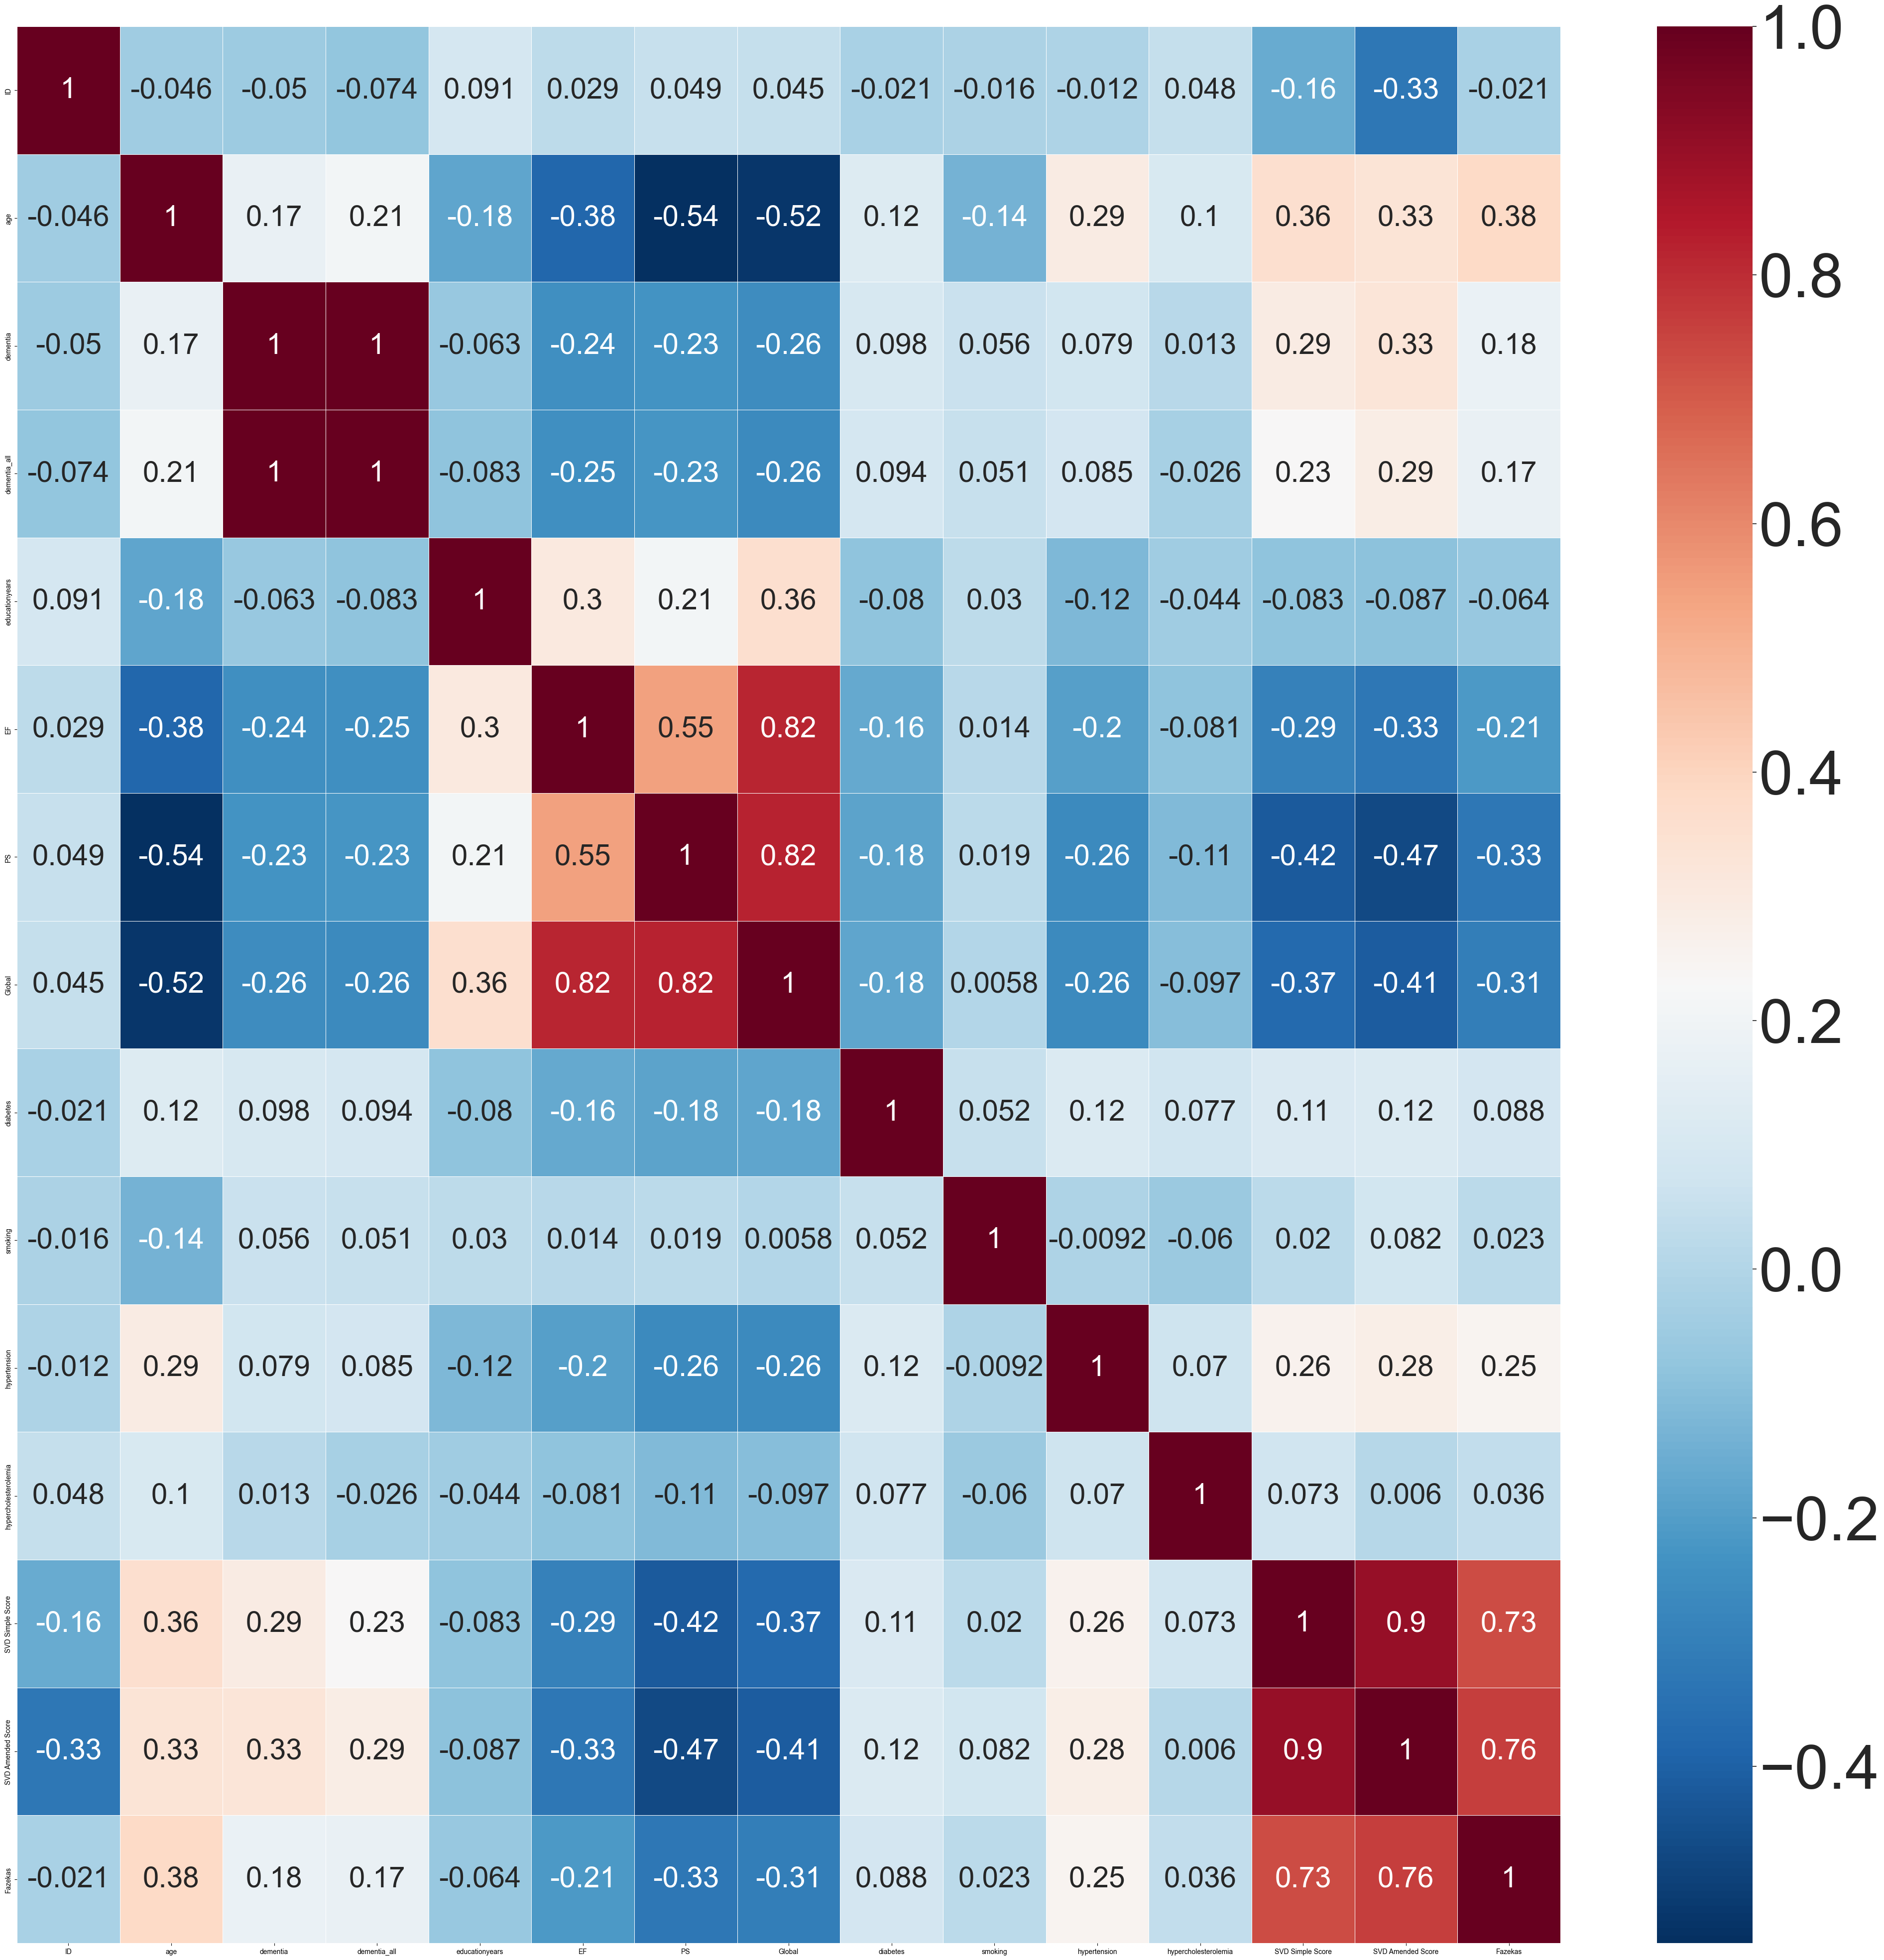

In [3]:
fig, ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=8.0)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax, annot_kws={"size":42},)


The Pearson Correlation Matrix, visualized as a heat map, shows the correlations between the features in the dataset. We did so to gather an understanding of which features in the dataset that might have the most impact on dementia_all, as this is the feature we want to be able to predict. 

The dataset is still consisting of nominal and categorical datatypes, hence to use the nominal data for modeling, we need to transform it to numerical data. 

## <font color=green> 3. Cleaning the dataset 2.0 </font> ##

In [4]:
#Overvej at sætte den her længere ned til de andre. Eller flytte de andre herop. 
dementia_data.replace({"gender":{"female" : 0, "male" : 1}}, inplace=True)

C:\Users\Study\AppData\Local\Temp\ipykernel_16008\1877105568.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dementia_data.replace({"gender":{"female" : 0, "male" : 1}}, inplace=True)


In [5]:
dementia_data

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,1,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,1,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,1,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,1,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,1,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,1,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,1,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,1,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,1,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,1,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67.00,0,0.0,0,13.0,-0.100000,-0.020000,-0.260000,0,...,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,0,Zero,0
1838,990,71.00,0,0.0,0,13.0,-0.370000,-1.060000,-1.003333,0,...,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0
1839,991,55.00,1,0.0,0,10.0,0.460000,0.960000,0.610000,0,...,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0
1840,995,54.00,1,0.0,0,10.0,0.190000,0.030000,0.590000,0,...,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,1,Zero,0


Our target feature is *dementia_all*. This feature is want we aim to predict with our model and given the correlation with the other features. *dementia_all* is a duplication of the feature *dementia*. However, *dementia* contains 34 missing values (NaN), whereas these values has been assigned with the value 1 in the feature *dementia_all*. 


with the argument of creating a model that rather predicts a false positive than a false negative <font color = yellow> (source????) </font>, *dementia_all* are chosen as the target feature, which is the same argument for creating the colum in the first place and assigning the missing values with the value 1, in stead of dropping the 34 rows containing missing values. 

In order to include the different feature in our correlation matrix later on, we transform the datatypes of the features containing objects as datatypes. 

In [6]:
dementia_data.rename(columns={"SVD Simple Score": "svd_simple_score", "SVD Amended Score": "svd_amended_score"})

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,svd_simple_score,svd_amended_score,Fazekas,lac_count,CMB_count
0,1,52.67,1,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,1,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,1,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,1,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,1,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,1,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,1,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,1,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,1,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,1,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67.00,0,0.0,0,13.0,-0.100000,-0.020000,-0.260000,0,...,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,0,Zero,0
1838,990,71.00,0,0.0,0,13.0,-0.370000,-1.060000,-1.003333,0,...,1,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0
1839,991,55.00,1,0.0,0,10.0,0.460000,0.960000,0.610000,0,...,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0
1840,995,54.00,1,0.0,0,10.0,0.190000,0.030000,0.590000,0,...,1,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,1,Zero,0


By deciding on using *dementia_all* as the target feature, we are no longer in need of the *dementia*, hence this will be removed from the dataset. Furthermore, the two features *study* and *study1* is once again a duplikation of information of which study the information came from. The *study1* column does not include new information, hence its purpose in this study and development of a model to predict dementia, the feature is not relevant. 

<font color = yellow>   </font>

In [7]:
dementia_data.drop("dementia", axis=1, inplace=True)



In [8]:
dementia_data.drop("study1", axis=1, inplace=True)
dementia_data.drop("ID", axis=1, inplace=True)
dementia_data.drop("study", axis=1, inplace=True)

In [9]:
dementia_data

,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,52.67,1,0,11.0,-2.403333,-1.290000,-1.287000,0,2.0,1,1,more-than-zero,2 to 3,3.0,7.0,3,>5,>=1
1,64.58,1,0,10.0,1.280000,0.360000,0.744000,0,1.0,1,1,more-than-zero,0 to 1,2.0,3.0,1,1 to 2,>=1
2,74.92,1,0,8.0,-1.440000,-1.520000,-0.922000,0,0.0,1,1,more-than-zero,0 to 1,1.0,2.0,1,1 to 2,0
3,74.83,1,1,9.0,NaN,-2.136271,-1.301102,0,2.0,1,1,more-than-zero,2 to 3,2.0,4.0,2,3 to 5,0
4,79.25,1,0,10.0,-0.920000,-1.493333,-0.924000,0,1.0,1,1,more-than-zero,2 to 3,2.0,3.0,2,1 to 2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,67.00,0,0,13.0,-0.100000,-0.020000,-0.260000,0,0.0,1,1,zero,0 to 1,NaN,NaN,0,Zero,0
1838,71.00,0,0,13.0,-0.370000,-1.060000,-1.003333,0,0.0,1,1,zero,0 to 1,NaN,NaN,1,Zero,0
1839,55.00,1,0,10.0,0.460000,0.960000,0.610000,0,1.0,0,1,zero,0 to 1,0.0,0.0,0,Zero,0
1840,54.00,1,0,10.0,0.190000,0.030000,0.590000,0,1.0,0,1,zero,0 to 1,0.0,0.0,1,Zero,0


In [10]:
dementia_data['lac_count'].unique()

array(['>5', '1 to 2', '3 to 5', 'Zero'], dtype=object)

In [11]:

dementia_data['fazekas_cat'].unique()

array(['2 to 3', '0 to 1'], dtype=object)

In [12]:
dementia_data['lacunes_num'].unique()

array(['more-than-zero', 'zero'], dtype=object)

In [13]:
dementia_data['SVD Simple Score'].unique()

array([ 3.,  2.,  1.,  0., nan])

In [14]:
dementia_data['SVD Amended Score'].unique()

array([ 7.,  3.,  2.,  4.,  1.,  6.,  5.,  0., nan])

As we found out earlier on, a magnificicant amount of rows (677) contains missing values (NaN) within the feature *'SVD simple score'* and *'SVD Amended Score'*. As these features indicates the results of patient's MRI scan. Hence, it is assumed that the patient's whose rows include NaN values within theses features, have not been scanned, which serves as an argument of filling these missing values with the value of 0. Taken the assumption, that patients will not require a MRI scan unless they are showing symptoms, into account. 

In [15]:
dementia_data['SVD Simple Score'].fillna(dementia_data['SVD Simple Score'].mode()[0], inplace = True)
dementia_data['SVD Amended Score'].fillna(dementia_data['SVD Amended Score'].mode()[0], inplace = True)


C:\Users\Study\AppData\Local\Temp\ipykernel_16008\71824731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dementia_data['SVD Simple Score'].fillna(dementia_data['SVD Simple Score'].mode()[0], inplace = True)
C:\Users\Study\AppData\Local\Temp\ipykernel_16008\71824731.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [16]:
#Just checking that the code worked, there are no more NaN values included in the feature. 
dementia_data['SVD Simple Score'].unique()

array([3., 2., 1., 0.])

Arguing that the ones with a missing value within the smoking feature, we assume that they are never-smokers (0)

In [17]:
dementia_data['smoking'].fillna(0, inplace = True)
dementia_data.smoking.unique()

C:\Users\Study\AppData\Local\Temp\ipykernel_16008\3992366947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dementia_data['smoking'].fillna(0, inplace = True)


array([2., 1., 0.])

As well within the features *EF*, *PS* and *Global* there is a noticeable amount of missing values (respectively 208, 268, and 308). The same argument as above-mentioned does not apply to these features as EF (Executive function), PS (Processing Speed), and Global (Global Cognitive Score) are not 0 as the patients would then have no EF, PS, and Global. In stead we replace the NaN values in these three features with the mean of the values included in the respective features.

In [18]:
dementia_data['EF'].fillna(dementia_data['EF'].mean(), inplace = True)
dementia_data['PS'].fillna(dementia_data['PS'].mean(), inplace = True)
dementia_data['Global'].fillna(dementia_data['Global'].mean(), inplace = True)

C:\Users\Study\AppData\Local\Temp\ipykernel_16008\3183005476.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dementia_data['EF'].fillna(dementia_data['EF'].mean(), inplace = True)
C:\Users\Study\AppData\Local\Temp\ipykernel_16008\3183005476.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [19]:
#Just checking whether we managed to exclude missing values 
dementia_data.isna().sum()

age                     0
gender                  0
dementia_all            0
educationyears          0
EF                      0
PS                      0
Global                  0
diabetes                0
smoking                 0
hypertension            0
hypercholesterolemia    0
lacunes_num             0
fazekas_cat             0
SVD Simple Score        0
SVD Amended Score       0
Fazekas                 0
lac_count               0
CMB_count               0
dtype: int64

In [20]:
dementia_data['lac_count'].unique()

array(['>5', '1 to 2', '3 to 5', 'Zero'], dtype=object)

In [21]:
dementia_data['CMB_count'].unique()

array(['>=1', '0'], dtype=object)

In [22]:
dementia_data['lacunes_num'].unique()

array(['more-than-zero', 'zero'], dtype=object)

In [23]:
#Replacing the columns with numerical values.
dementia_data.replace({"lacunes_num": {"zero": 0, "more-than-zero": 1}}, inplace=True)
dementia_data.replace({"fazekas_cat": {"0 to 1": 0, "2 to 3": 1}}, inplace=True)
dementia_data.replace({"lac_count": {"Zero": 0, "1 to 2": 1, "3 to 5": 3, ">5": 5}},inplace=True)
dementia_data.replace({"CMB_count": {"0": 0, ">=1": 1}}, inplace=True)

C:\Users\Study\AppData\Local\Temp\ipykernel_16008\629375501.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dementia_data.replace({"lacunes_num": {"zero": 0, "more-than-zero": 1}}, inplace=True)
C:\Users\Study\AppData\Local\Temp\ipykernel_16008\629375501.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dementia_data.replace({"fazekas_cat": {"0 to 1": 0, "2 to 3": 1}}, inplace=True)
C:\Users\Study\AppData\Local\Temp\ipykernel_16008\629375501.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be rem

In [24]:
dementia_data['lacunes_num'].unique()

array([1, 0], dtype=int64)

In [25]:
dementia_data.dtypes

age                     float64
gender                    int64
dementia_all              int64
educationyears          float64
EF                      float64
PS                      float64
Global                  float64
diabetes                  int64
smoking                 float64
hypertension              int64
hypercholesterolemia      int64
lacunes_num               int64
fazekas_cat               int64
SVD Simple Score        float64
SVD Amended Score       float64
Fazekas                   int64
lac_count                 int64
CMB_count                 int64
dtype: object

In [26]:
dementia_data

,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,52.67,1,0,11.0,-2.403333,-1.290000,-1.287000,0,2.0,1,1,1,1,3.0,7.0,3,5,1
1,64.58,1,0,10.0,1.280000,0.360000,0.744000,0,1.0,1,1,1,0,2.0,3.0,1,1,1
2,74.92,1,0,8.0,-1.440000,-1.520000,-0.922000,0,0.0,1,1,1,0,1.0,2.0,1,1,0
3,74.83,1,1,9.0,-0.063088,-2.136271,-1.301102,0,2.0,1,1,1,1,2.0,4.0,2,3,0
4,79.25,1,0,10.0,-0.920000,-1.493333,-0.924000,0,1.0,1,1,1,1,2.0,3.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,67.00,0,0,13.0,-0.100000,-0.020000,-0.260000,0,0.0,1,1,0,0,0.0,0.0,0,0,0
1838,71.00,0,0,13.0,-0.370000,-1.060000,-1.003333,0,0.0,1,1,0,0,0.0,0.0,1,0,0
1839,55.00,1,0,10.0,0.460000,0.960000,0.610000,0,1.0,0,1,0,0,0.0,0.0,0,0,0
1840,54.00,1,0,10.0,0.190000,0.030000,0.590000,0,1.0,0,1,0,0,0.0,0.0,1,0,0


In [27]:
dementia_data.dtypes


age                     float64
gender                    int64
dementia_all              int64
educationyears          float64
EF                      float64
PS                      float64
Global                  float64
diabetes                  int64
smoking                 float64
hypertension              int64
hypercholesterolemia      int64
lacunes_num               int64
fazekas_cat               int64
SVD Simple Score        float64
SVD Amended Score       float64
Fazekas                   int64
lac_count                 int64
CMB_count                 int64
dtype: object

## <font color=green> 4. Visualization 2.0 </font> ##

In [28]:
corr = dementia_data. corr(method='pearson', numeric_only=True)
corr

,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
age,1.000000,-0.048923,0.206106,-0.175322,-0.357478,-0.496087,-0.474078,0.123195,-0.133302,0.291202,0.103096,0.180019,0.369484,0.216010,0.178381,0.379611,0.138951,0.075055
gender,-0.048923,1.000000,0.048482,0.191415,-0.014877,-0.010852,0.019219,0.048114,0.297536,0.017031,-0.064161,0.123527,-0.023281,0.090987,0.130582,-0.023803,0.122005,0.094694
dementia_all,0.206106,0.048482,1.000000,-0.083296,-0.196025,-0.176607,-0.200561,0.093783,0.051920,0.084812,-0.026371,0.186801,0.152944,0.246486,0.289772,0.170325,0.208621,0.129468
educationyears,-0.175322,0.191415,-0.083296,1.000000,0.276457,0.186121,0.320149,-0.079616,0.028683,-0.117190,-0.043548,-0.024274,-0.060008,-0.038689,-0.035107,-0.064082,0.006146,0.002628
EF,-0.357478,-0.014877,-0.196025,0.276457,1.000000,0.524222,0.781139,-0.148543,0.012949,-0.188441,-0.074314,-0.198237,-0.188148,-0.206458,-0.232521,-0.196193,-0.248596,-0.088569
PS,-0.496087,-0.010852,-0.176607,0.186121,0.524222,1.000000,0.801571,-0.161296,0.019634,-0.246537,-0.100267,-0.254788,-0.287312,-0.241489,-0.263045,-0.298313,-0.296193,-0.111933
Global,-0.474078,0.019219,-0.200561,0.320149,0.781139,0.801571,1.000000,-0.154204,0.005525,-0.241904,-0.086175,-0.222645,-0.260294,-0.234472,-0.255913,-0.273495,-0.274023,-0.107105
diabetes,0.123195,0.048114,0.093783,-0.079616,-0.148543,-0.161296,-0.154204,1.000000,0.048586,0.118692,0.077341,0.109053,0.104685,0.075211,0.074777,0.088394,0.083608,0.001065
smoking,-0.133302,0.297536,0.051920,0.028683,0.012949,0.019634,0.005525,0.048586,1.000000,-0.010859,-0.062258,0.099082,-0.009774,0.085776,0.139070,0.024862,0.075680,0.068242
hypertension,0.291202,0.017031,0.084812,-0.117190,-0.188441,-0.246537,-0.241904,0.118692,-0.010859,1.000000,0.069717,0.168714,0.211451,0.191112,0.196130,0.248769,0.140422,0.102617


<Axes: >

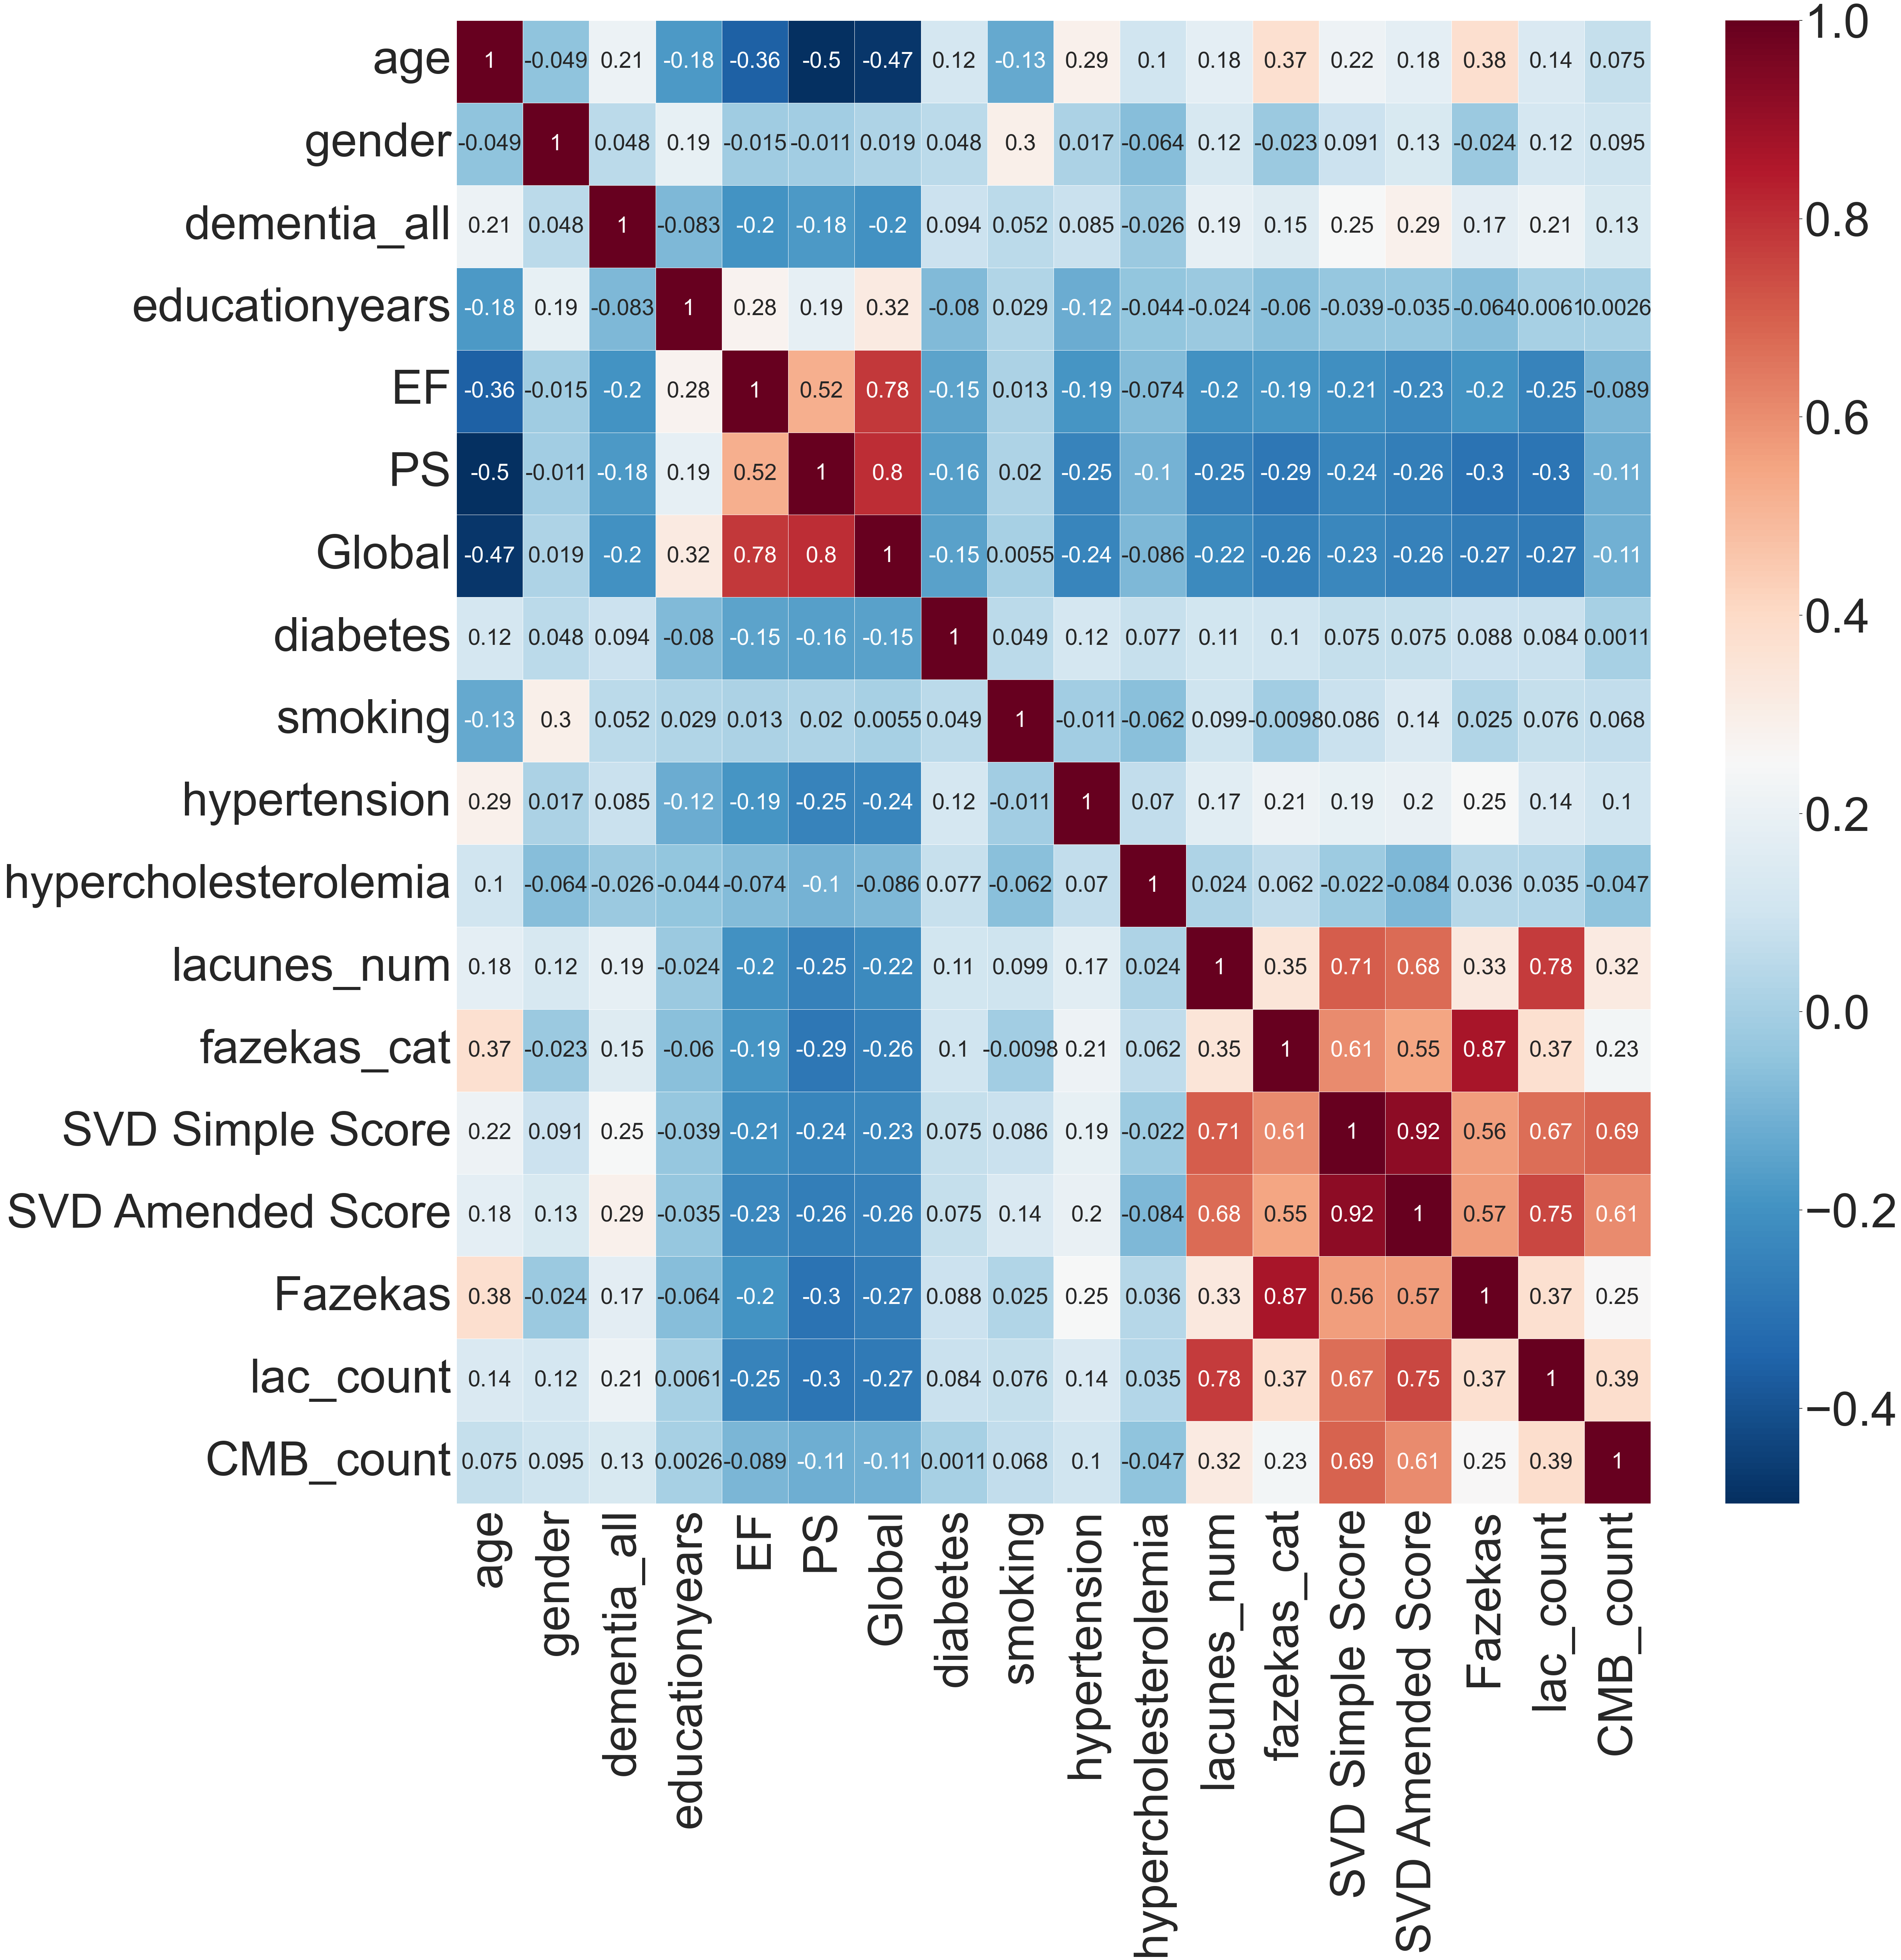

In [29]:
fig, ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=8.0)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax, annot_kws={"size":42},)


Redoing the heatmap once the data has been cleaned shows an even lesser correlation with our target feature *dementia_all*

In [30]:
import matplotlib.pyplot as plt



In [31]:
dementia_data

,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,52.67,1,0,11.0,-2.403333,-1.290000,-1.287000,0,2.0,1,1,1,1,3.0,7.0,3,5,1
1,64.58,1,0,10.0,1.280000,0.360000,0.744000,0,1.0,1,1,1,0,2.0,3.0,1,1,1
2,74.92,1,0,8.0,-1.440000,-1.520000,-0.922000,0,0.0,1,1,1,0,1.0,2.0,1,1,0
3,74.83,1,1,9.0,-0.063088,-2.136271,-1.301102,0,2.0,1,1,1,1,2.0,4.0,2,3,0
4,79.25,1,0,10.0,-0.920000,-1.493333,-0.924000,0,1.0,1,1,1,1,2.0,3.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,67.00,0,0,13.0,-0.100000,-0.020000,-0.260000,0,0.0,1,1,0,0,0.0,0.0,0,0,0
1838,71.00,0,0,13.0,-0.370000,-1.060000,-1.003333,0,0.0,1,1,0,0,0.0,0.0,1,0,0
1839,55.00,1,0,10.0,0.460000,0.960000,0.610000,0,1.0,0,1,0,0,0.0,0.0,0,0,0
1840,54.00,1,0,10.0,0.190000,0.030000,0.590000,0,1.0,0,1,0,0,0.0,0.0,1,0,0


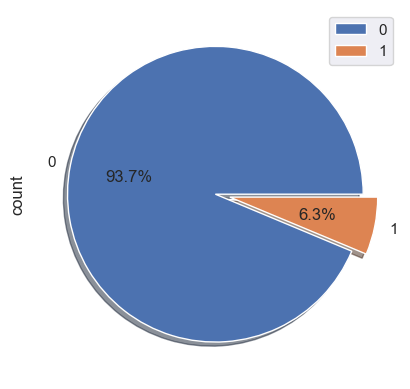

In [32]:
sns.set(font_scale=1.0)
dementia_data['dementia_all'].value_counts().plot(kind='pie', explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.legend(dementia_data["dementia_all"].value_counts().index)
plt.show()

Only 6.3% of the participants in the dataset have been diagnosed with dementia. When looking in to how the dataset is divided on gender, it is almost 50/50 with 

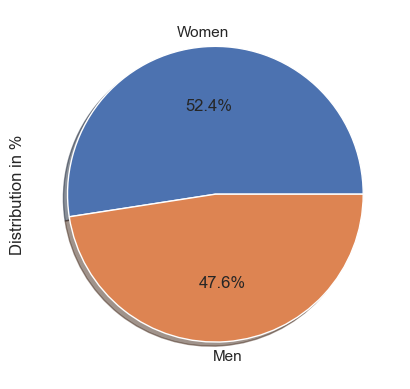

In [51]:
ax = dementia_data['gender'].value_counts().sort_index().plot(kind='pie',rot=0, ylabel='Distribution in %',labels=['Women','Men'], 
                                                                   shadow=True, autopct='%1.1f%%',textprops={'horizontalalignment': 'center'})
plt.savefig("img/pie_chart_gender")

Rectangle(xy=(-0.375, 0), width=0.75, height=44, angle=0)
Rectangle(xy=(0.625, 0), width=0.75, height=53, angle=0)
Rectangle(xy=(1.625, 0), width=0.75, height=19, angle=0)
Rectangle(xy=(-0.375, 44), width=0.75, height=868, angle=0)
Rectangle(xy=(0.625, 53), width=0.75, height=624, angle=0)
Rectangle(xy=(1.625, 19), width=0.75, height=234, angle=0)


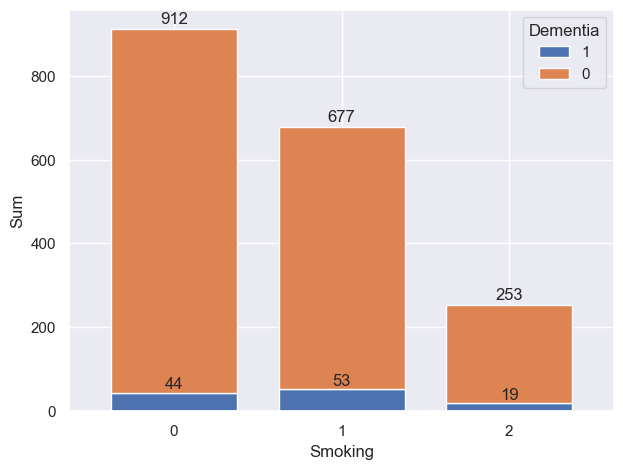

In [75]:
#distribution 
#bloxplottet er bedre til smoking (nok)
distribution_features = ["age", "educationyears", "smoking"]
boxplot_feature = ["smoking", "educationyears"]
bar_feature = ["smoking"]
img_folder = "img/"



# for feature in distribution_features: 
#     sns.kdeplot(dementia_data, x=feature, hue="dementia_all")
#     plt.title("Distribution for " + feature)
#     plt.savefig(img_folder + "dis_" + feature)
#     plt.show()

# for feature in boxplot_feature:
#     sns.boxplot(dementia_data, x="dementia_all", y=feature)
#     plt.title("Boxplot for " + feature)
#     plt.savefig(img_folder + "box_" + feature)
#     plt.show()


for feature in bar_feature: 

    grouped_data = dementia_data.groupby(['smoking', 'dementia_all']).size().reset_index(name='count')

    # Pivot the data to prepare for plotting
    pivot_data = grouped_data.pivot(index='smoking', columns='dementia_all', values='count').fillna(0)
    pivot_data = pivot_data.reindex(columns=[1, 0])

    # Create the stacked bar plot
    ax = pivot_data.plot(kind='bar', stacked=True, width=0.75)
    for p in ax.patches:
        print(p)
        if p.get_height() < 100: 
            text= str(int(p.get_height()))
        ax.annotate(text, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 6), textcoords='offset points')
        text = None
    totals = pivot_data.sum(axis=1)
    for i, total in enumerate(totals):

        ax.text(i, total + 6, str(int(total)), ha='center', va='bottom')
    plt.xticks(range(len(pivot_data.index)), pivot_data.index.astype(int))
    plt.xlabel("Smoking")
    plt.ylabel("Sum")
    plt.legend(title='Dementia', loc='upper right')
    plt.tight_layout()
    plt.xticks(rotation=0)
    plt.savefig(img_folder + "bar_" + feature)
    plt.show()



,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,52.67,1,0,11.0,-2.403333,-1.290000,-1.287000,0,2.0,1,1,1,1,3.0,7.0,3,5,1
1,64.58,1,0,10.0,1.280000,0.360000,0.744000,0,1.0,1,1,1,0,2.0,3.0,1,1,1
2,74.92,1,0,8.0,-1.440000,-1.520000,-0.922000,0,0.0,1,1,1,0,1.0,2.0,1,1,0
3,74.83,1,1,9.0,-0.063088,-2.136271,-1.301102,0,2.0,1,1,1,1,2.0,4.0,2,3,0
4,79.25,1,0,10.0,-0.920000,-1.493333,-0.924000,0,1.0,1,1,1,1,2.0,3.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,67.00,0,0,13.0,-0.100000,-0.020000,-0.260000,0,0.0,1,1,0,0,0.0,0.0,0,0,0
1838,71.00,0,0,13.0,-0.370000,-1.060000,-1.003333,0,0.0,1,1,0,0,0.0,0.0,1,0,0
1839,55.00,1,0,10.0,0.460000,0.960000,0.610000,0,1.0,0,1,0,0,0.0,0.0,0,0,0
1840,54.00,1,0,10.0,0.190000,0.030000,0.590000,0,1.0,0,1,0,0,0.0,0.0,1,0,0


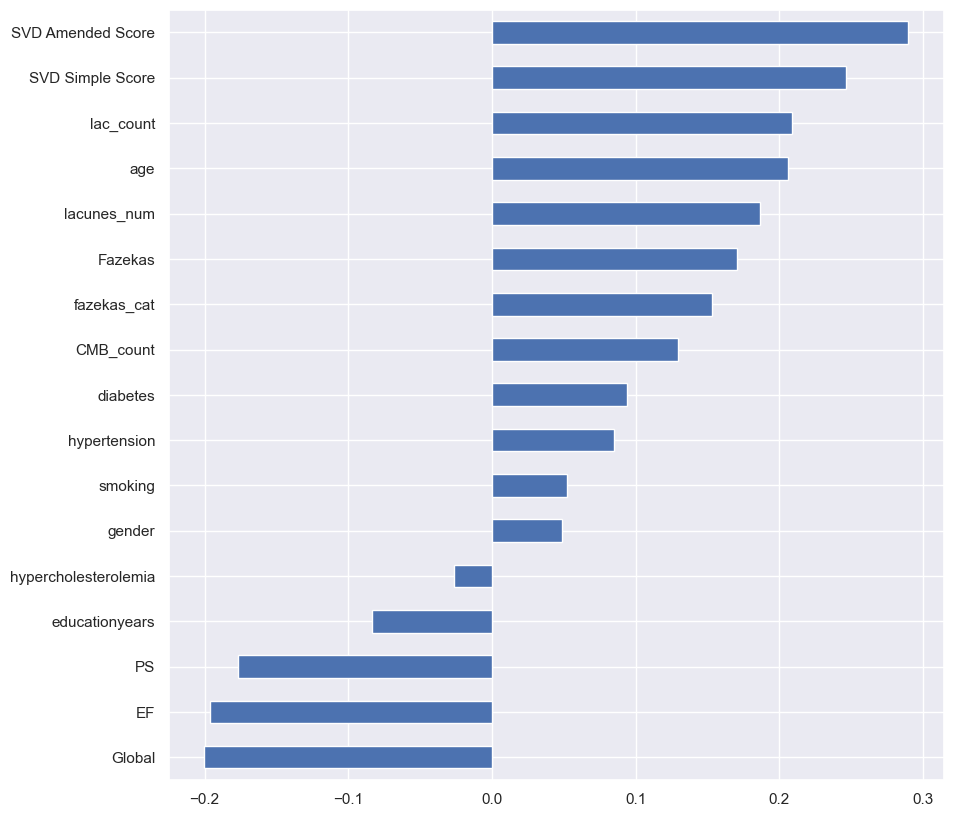

In [35]:
dementia_data.drop('dementia_all', axis=1).corrwith(dementia_data.dementia_all).sort_values().plot(kind='barh',figsize=(10,10))
dementia_data

We are selecting 13 feature to do model traning, chosen on their absolete values

In [36]:
NUMBER_OF_FEATURES = 13
corr = dementia_data.drop('dementia_all', axis=1).corrwith(dementia_data.dementia_all).abs().sort_values(ascending=False)
n_features = corr.head(NUMBER_OF_FEATURES)
type(n_features)


pandas.core.series.Series

In [37]:
model_features = n_features.index.to_numpy()
model_features


array(['SVD Amended Score', 'SVD Simple Score', 'lac_count', 'age',
       'Global', 'EF', 'lacunes_num', 'PS', 'Fazekas', 'fazekas_cat',
       'CMB_count', 'diabetes', 'hypertension'], dtype=object)

In [38]:
dementia_data.to_csv('data/dementia_data_cleaned_v2.csv', sep=',', index=False)